### 引入必要的模块

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 读入数据

In [2]:
data = pd.read_csv('ex2data1.txt',header=None,names=['Exam 1','Exam 2','Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### 绘制散点图

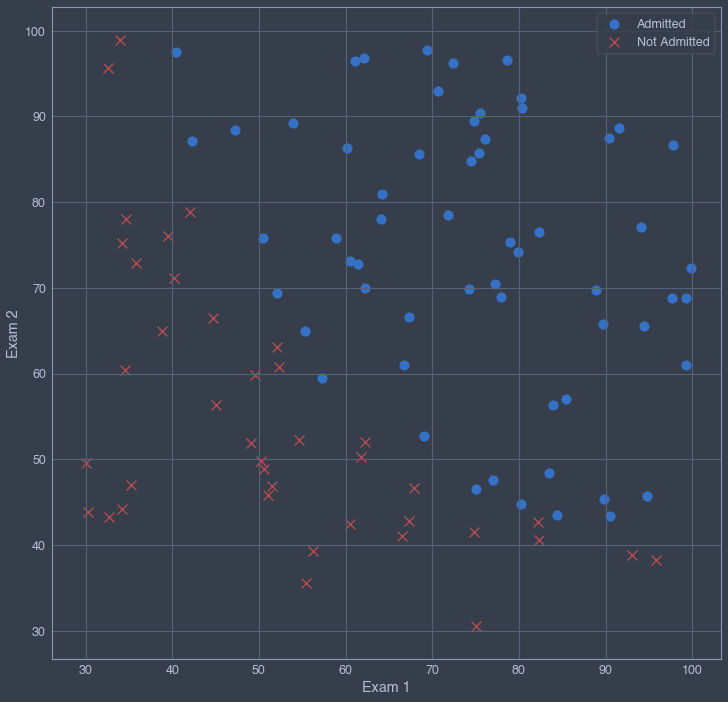

In [3]:
# 拿到positive 和negative 的数据
positive = data[data['Admitted'] == 1]
negative = data[data['Admitted'] == 0]
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(positive['Exam 1'],
           positive['Exam 2'],
           color='b',
           marker='o',
           s=100,
           label='Admitted')
ax.scatter(negative['Exam 1'],
           negative['Exam 2'],
           color='r',
           marker='x',
           s=100,
           label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1')
ax.set_ylabel('Exam 2')
plt.show()

### 尝试用线性分类器方式学习

#### 创建sigmoid 函数
看一下sigmod的曲线

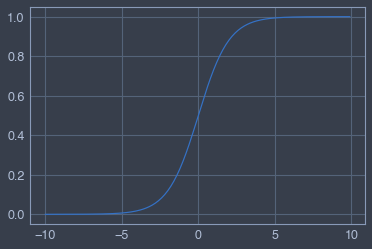

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


xrange = np.arange(-10, 10, step=0.1)
plt.plot(xrange, sigmoid(xrange))

#### 构造代价函数
代价函数：
$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$

In [5]:
def computeCost(theta, X, y):
    first = -np.log(sigmoid(theta.T @ X.T)) @ y
    second = np.log(1 - sigmoid(theta.T @ X.T)) @ (1 - y)
    return (first - second) / len(y)

#### 梯度下降
转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [6]:
# 下面是和ex1一样的构建梯度下降方法
# 但问题是，不知道theta初始化为何值才合适
def gradientDescent(X, y, theta, alpha, iters):
    m = len(y)
    J_history = [computeCost(theta,X, y)]
    for i in np.arange(iters):
        theta = theta - X.T @ (sigmoid(X @ theta) - y) * alpha / m  # 这里做的是线性分类器，因为X没做多项式处理
        thisJ = computeCost(theta,X, y)
#         if i % 500 == 0:
#             print('theta is: ',theta,' ----- J = ',thisJ)
        J_history.append(thisJ)
    return theta, J_history

#### 构造预测方法和准确度评估方法

In [7]:
def predict(theta, X):
    probability = sigmoid(X @ theta)
    return [1 if x >= 0.5 else 0 for x in probability]


def accuracy(_theta, _X, _y):
    predictions = predict(_theta, _X)
    correct = [
        1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0
        for (a, b) in zip(predictions, _y)
    ]
    #accuracy = (sum(map(int, correct)) % len(correct))
    accuracy = np.mean(correct)
    print('accuracy = {0}%'.format(accuracy))

#### 构造分类器可视化方法

In [8]:
def plot_dataset(df):
    positive = df[df['Admitted'] == 1]
    negative = df[df['Admitted'] == 0]
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.scatter(positive['Exam 1'],
               positive['Exam 2'],
               color='b',
               marker='o',
               s=100,
               label='Admitted')
    ax.scatter(negative['Exam 1'],
               negative['Exam 2'],
               color='r',
               marker='x',
               s=100,
               label='Not Admitted')
    ax.legend()
    ax.set_xlabel('Exam 1')
    ax.set_ylabel('Exam 2')


def plot_predictions(_theta, axes):
    x0s = np.linspace(axes[0], axes[1], 200)
    x1s = np.linspace(axes[2], axes[3], 200)
    x0, x1 = np.meshgrid(x0s, x1s)
    _X = np.c_[np.ones(40000), x0.ravel(), x1.ravel()]
    #print(_X)
    y_pred1 = np.array(predict(_theta, _X))
    y_pred = y_pred1.reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    return y_pred1, y_pred  # 这个return只是为了检查数据方便

#### 获得训练数据

In [9]:
def get_Xy(df):
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1]
    return X, y

# 用ex1的方法进行梯度下降，之前先填充一列“1”
if 'Ones' not in data.columns:
    data.insert(0, 'Ones', 1)

X, y = get_Xy(data)
computeCost(np.zeros(3), X, y)

0.6931471805599452

#### 执行梯度下降，并画出J的曲线

/Users/jianglongzhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


[-20.01756085   0.16512584   0.15983612]
0.20826422565545083
accuracy = 0.89%


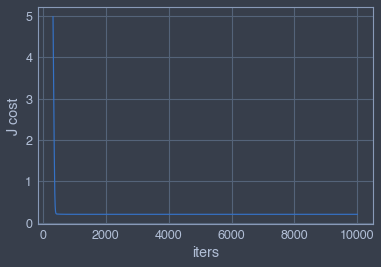

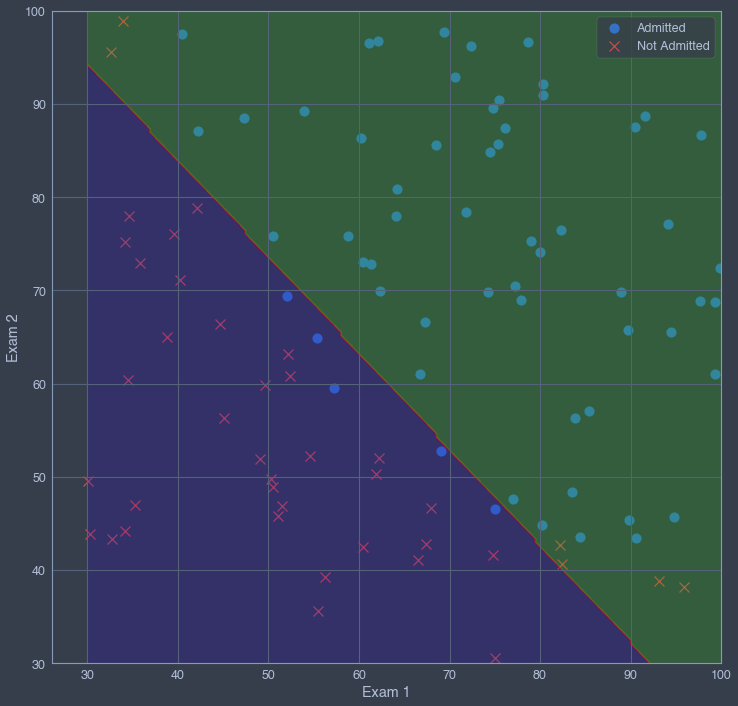

In [10]:
# 可以看到，不知如何初始化theta、alpha、iters等值，实际上得不到太好的结果。
theta = np.array([-20,1,1])
alpha = 0.0001
iters = 10000
final_theta,J_history = gradientDescent(X,y,theta,alpha,iters)
print(final_theta)
final_J = computeCost(final_theta,X, y)
print(final_J)
accuracy(final_theta,X,y)
# 画出 J 的下降曲线
plt.plot(range(iters+1),J_history)
plt.xlabel('iters')
plt.ylabel('J cost')
plt.show()
# 画出分类器
plot_dataset(data)
y1, y2 = plot_predictions(final_theta, [30, 100, 30, 100])
plt.show()

### 使用更高级的学习方法
讲座中在Octave中使用fminuc函数来优化cost和梯度参数，我们在这里使用SciPy的optimize命名空间来做相同的事。

In [35]:
# 先定义下降的步长函数
def gradient(theta,X, y):
    m = len(y)
    gradient = X.T @ (sigmoid(X @ theta) - y) / m
    return gradient


#gradient(np.array([0, 0, 0]),X, y)

使用SciPy的Truncated newton（TNC）实现寻找最优参数。

In [12]:
import scipy.optimize as opt
theta = np.zeros(3)
result = opt.fmin_tnc(func=computeCost,x0=theta,fprime=gradient,args=(X,y))
result

(array([-25.16131854,   0.20623159,   0.20147149]), 36, 0)

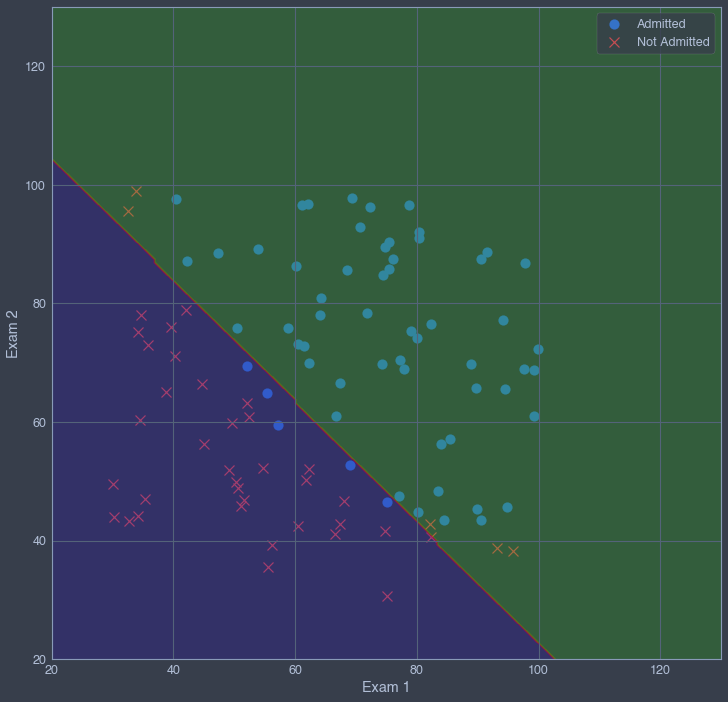

accuracy = 0.89%


In [13]:
plot_dataset(data)
y1, y2 = plot_predictions(result[0], [20, 130, 20, 130])
plt.show()
accuracy(result[0],X,y)

### 正则化逻辑回归

#### 正则化的代价函数
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [14]:
def reg_computeCost(theta,X,y,lam=1):
    m = len(y)
    theta_1ton = theta[1:]
    reg = lam / (2 * m) * (theta_1ton.T @ theta_1ton)
    return computeCost(theta,X,y) + reg


#### 正则化的下降梯度
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\left( \frac{1}{m}\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}\left( {{x}^{\left( i \right)}} \right)-{{y}^{\left( i \right)}} \right)} \right)+\frac{\lambda }{m}{{\theta }_{j}}\text{ }\text{             for  j}\ge \text{1}$$

In [30]:
def reg_gradient(theta,X,y,lam=1):
    m = len(y)
    theta_1ton = theta[1:]
    reg = lam *theta_1ton / m
    reg = np.concatenate([[0],reg])
    return gradient(theta,X,y) + reg

reg_gradient(np.zeros(X.shape[1]),X,y)

(3,)
(3,)


array([ -0.1       , -12.00921659, -11.26284221])

#### 获得数据

In [16]:
data2 = pd.read_csv("ex2data2.txt",header=None,names=['Test 1','Test 2','Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


#### 打印出散点图观察数据

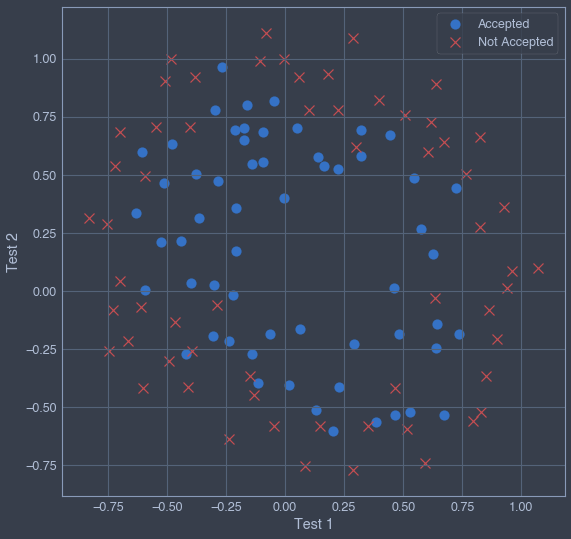

In [17]:
def plot_data2(df):
    positive = df[df['Accepted'] == 1]
    negative = df[df['Accepted'] == 0]
    fig, ax = plt.subplots(figsize=(9, 9))
    ax.scatter(positive['Test 1'],
               positive['Test 2'],
               color='b',
               marker='o',
               s=100,
               label='Accepted')
    ax.scatter(negative['Test 1'],
               negative['Test 2'],
               color='r',
               marker='x',
               s=100,
               label='Not Accepted')
    ax.legend()
    ax.set_xlabel('Test 1')
    ax.set_ylabel('Test 2')

plot_data2(data2)
plt.show()

#### 构建多项式
从散点图中可看出，此边界非线性，因此需要构建多项式
polynomial expansion

```
for i in 0..i
  for p in 0..i:
    output x^(i-p) * y^p
```
构成的是（假设degree=6） $[1,x_1,x_2,x_1^2,x_1x_2,x_2^2,x_1^3,x_1x_2^2,x_1^2x_2,x_2^3...x_1x_2^5,x_2^6]$

In [18]:
def features_mapping(x1, x2, degree, as_ndarray=False):
    data = {
        'f{}{}'.format(i-p, p): np.power(x1, i - p) * np.power(x2, p)
        for i in np.arange(degree+1) for p in np.arange(i+1)
    }
    if as_ndarray:
        return pd.DataFrame(data).values
    else:
        return pd.DataFrame(data)

feature_data = features_mapping(data2['Test 1'],data2['Test 2'],degree = 6,as_ndarray=True)


#### 开始学习

In [19]:
X2 = feature_data
_, y2 = get_Xy(data2)

theta = np.zeros(X2.shape[1])
# result = opt.fmin_tnc(func=reg_computeCost,x0=theta,fprime=reg_gradient,args=(X2,y2))
result = opt.minimize(fun=reg_computeCost,
                      x0=theta,
                      args=(X2, y2, 1),
                      method='Newton-CG',
                      jac=reg_gradient)
result

     fun: 0.5290027297127724
     jac: array([-2.30875604e-07, -2.92566504e-08, -1.28369238e-08, -6.43135112e-08,
        3.43752549e-09, -3.87883019e-08,  4.87592620e-09, -7.72844775e-09,
       -5.99838948e-09, -9.39267047e-09, -2.38322153e-08, -4.73993246e-10,
        3.18501248e-09, -1.48556669e-08, -1.15198083e-08,  6.02955567e-09,
       -9.49405079e-09,  6.01279130e-09, -1.89746649e-09, -5.24652454e-09,
        1.14293274e-08, -4.25797249e-09, -2.38494906e-11,  3.30292333e-09,
       -3.26558888e-10,  1.01603888e-09, -7.61560337e-09,  1.92358041e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 68
  status: 0
 success: True
       x: array([ 1.27273912,  0.62527063,  1.18108868, -2.01996138, -0.91742335,
       -1.43166384,  0.1240078 , -0.36553456, -0.35723922, -0.17513114,
       -1.45815633, -0.05098917, -0.61555361, -0.27470767, -1.19281668,
       -0.24218706, -0.20600683, -0.0447298 , -0.27778449, -0.29537807,
       -0.4

#### 查看报告

In [20]:
from sklearn.metrics import classification_report#这个包是评价报告
y_pred = np.array(predict(result.x,X2))
print(classification_report(y2,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



In [21]:
# from sklearn.metrics import classification_report#这个包是评价报告
# y_pred = np.array(predict(result[0],X2))
# print(classification_report(y2,y_pred))

#### 画出边界

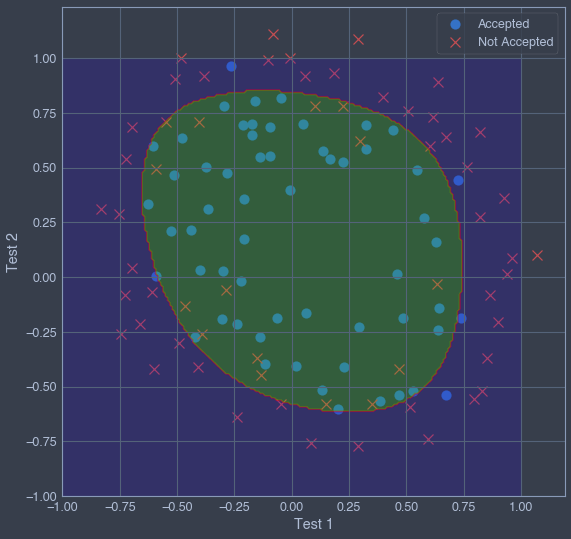

In [22]:
# todo
def draw_boundary(_theta, axes):
    x0s = np.linspace(axes[0], axes[1], 200)
    x1s = np.linspace(axes[2], axes[3], 200)
    x0, x1 = np.meshgrid(x0s, x1s)
    _X = features_mapping(x0.ravel(), x1.ravel(),degree=6,as_ndarray=True)
    #print(_X)
    y_pred1 = np.array(predict(_theta, _X))
    y_pred = y_pred1.reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    return y_pred1, y_pred  # 这个return只是为了检查数据方便

plot_data2(data2)
draw_boundary(result.x,[-1,1,-1,1])
plt.show()

### 不同lam值，决定overfitting 或 underfitting

In [23]:
def draw_boundary_withlam(degree=6, lam=1):
    axes = [-1, 1.25, -1, 1.25]
    data2 = pd.read_csv("ex2data2.txt",
                        header=None,
                        names=['Test 1', 'Test 2', 'Accepted'])
    plot_data2(data2)
    X2 = features_mapping(data2['Test 1'],
                          data2['Test 2'],
                          degree=degree,
                          as_ndarray=True)
    _, y2 = get_Xy(data2)
    theta = np.zeros(X2.shape[1])
    result = opt.minimize(fun=reg_computeCost,
                          x0=theta,
                          args=(X2, y2, lam),
                          method='Newton-CG',
                          jac=reg_gradient)

    x0s = np.linspace(axes[0], axes[1], 200)
    x1s = np.linspace(axes[2], axes[3], 200)
    x0, x1 = np.meshgrid(x0s, x1s)
    _X = features_mapping(x0.ravel(),
                          x1.ravel(),
                          degree=degree,
                          as_ndarray=True)
    #print(_X)
    y_pred = np.array(predict(result.x, _X))
    y_pred = y_pred.reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.title('Lambda = {}'.format(lam))
    plt.show()
    y_pred2 = np.array(predict(result.x,X2))
    print(classification_report(y2,y_pred2))

/Users/jianglongzhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jianglongzhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


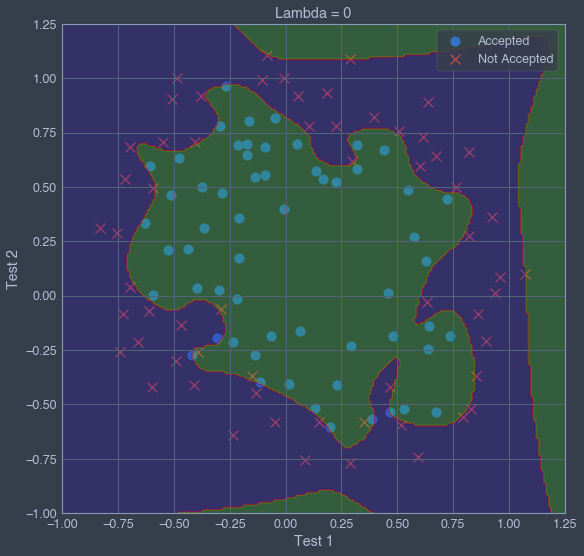

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        60
           1       0.93      0.95      0.94        58

    accuracy                           0.94       118
   macro avg       0.94      0.94      0.94       118
weighted avg       0.94      0.94      0.94       118



In [24]:
draw_boundary_withlam(degree=30,lam=0)

In [25]:
# 用第一个数据试试
def draw_boundary_withlam_data1(degree=6, lam=1):
    axes = [20, 100, 20, 100]
    data2 = pd.read_csv("ex2data1.txt",
                        header=None,
                        names=['Exam 1', 'Exam 2', 'Admitted'])
    plot_dataset(data2)
    X2 = features_mapping(data2['Exam 1'],
                          data2['Exam 2'],
                          degree=degree,
                          as_ndarray=True)
    _, y2 = get_Xy(data2)
    theta = np.zeros(X2.shape[1])
    result = opt.minimize(fun=reg_computeCost,
                          x0=theta,
                          args=(X2, y2, lam),
                          method='Newton-CG',
                          jac=reg_gradient)

    x0s = np.linspace(axes[0], axes[1], 200)
    x1s = np.linspace(axes[2], axes[3], 200)
    x0, x1 = np.meshgrid(x0s, x1s)
    _X = features_mapping(x0.ravel(),
                          x1.ravel(),
                          degree=degree,
                          as_ndarray=True)
    #print(_X)
    y_pred = np.array(predict(result.x, _X))
    y_pred = y_pred.reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.title('Lambda = {}'.format(lam))
    plt.show()
    y_pred2 = np.array(predict(result.x,X2))
    print(classification_report(y2,y_pred2))

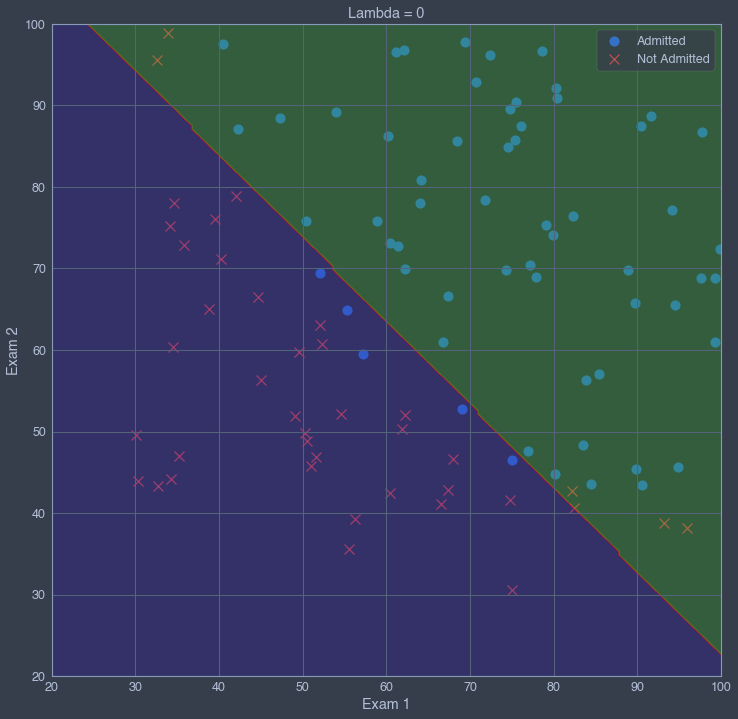

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



In [26]:
draw_boundary_withlam_data1(degree=1,lam=0)

In [36]:
y

0     0
1     0
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: Admitted, Length: 100, dtype: int64